In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#以灰度模式读取原始图像
img = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\img3.jpg', cv2.IMREAD_GRAYSCALE)

True

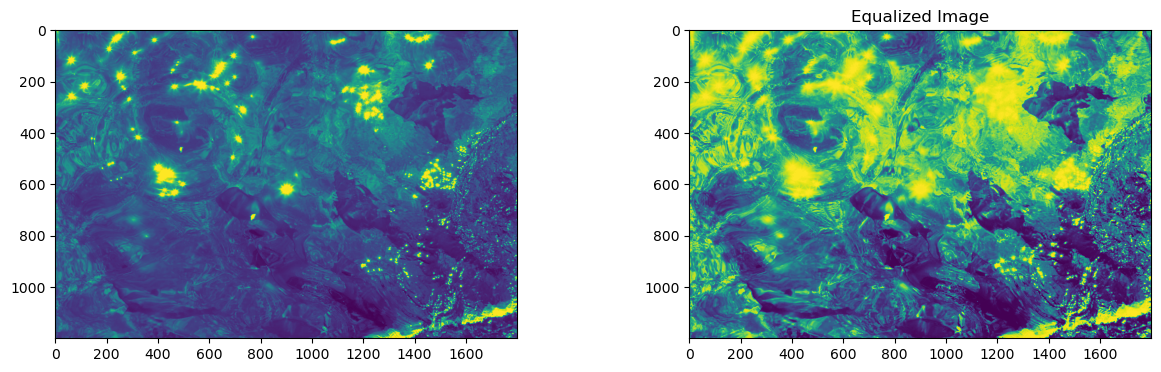

In [3]:
#将图像进行直方图均衡化增强对比度
img_eq = cv2.equalizeHist(img)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示直方图均衡化前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示直方图均衡化后的图像
axes[1].imshow(img_eq)
plt.title('Equalized Image')
#保存直方图均衡化后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_1.jpg', img_eq)

True

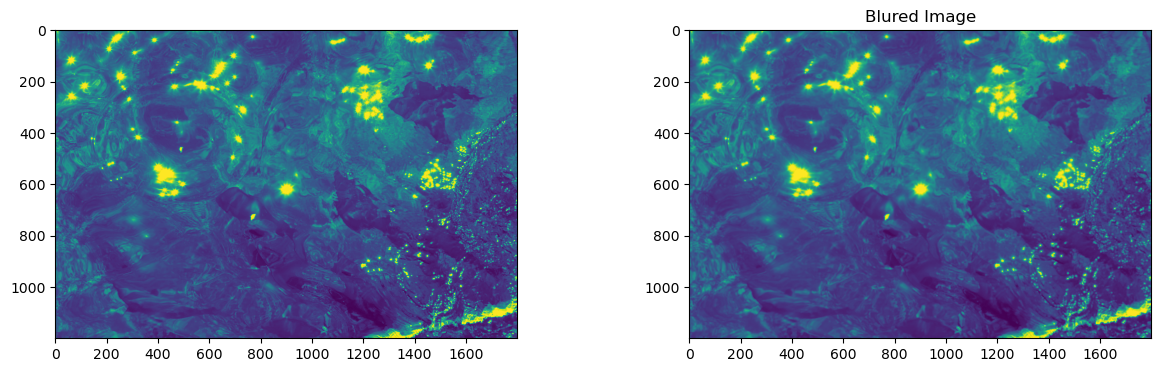

In [4]:
#应用高斯模糊，内核大小为（5, 5）
gaussBlur = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示高斯模糊处理前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示高斯模糊处理后的图像
axes[1].imshow(gaussBlur)
plt.title('Blured Image')
#保存高斯模糊处理后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_2.jpg',gaussBlur)

True

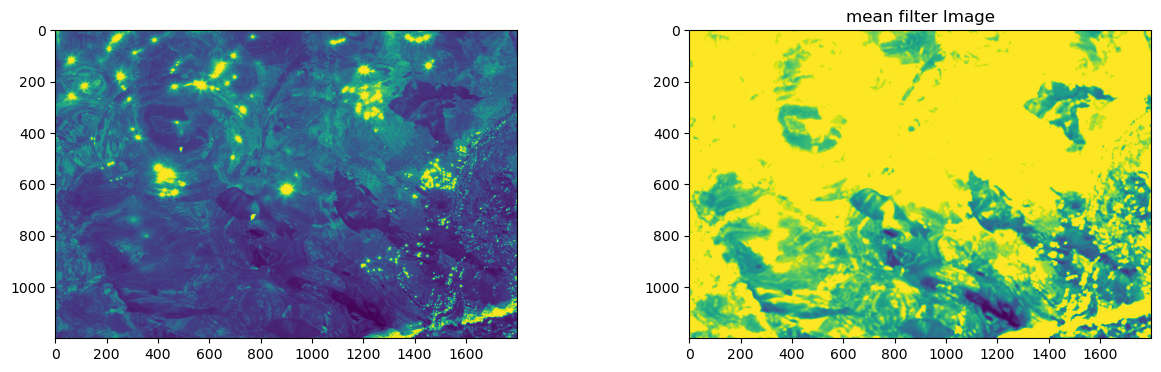

In [5]:
#创建一个10*10的均值滤波核
kernel = np.ones((10,10),np.float32)/25
#使用filter2D应用滤波处理图像
meanFilter = cv2.filter2D(img,-1,kernel)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示均值滤波处理前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示均值滤波处理后的图像
axes[1].imshow(meanFilter)
plt.title('mean filter Image')
#保存均值滤波处理后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_3.jpg',meanFilter)

True

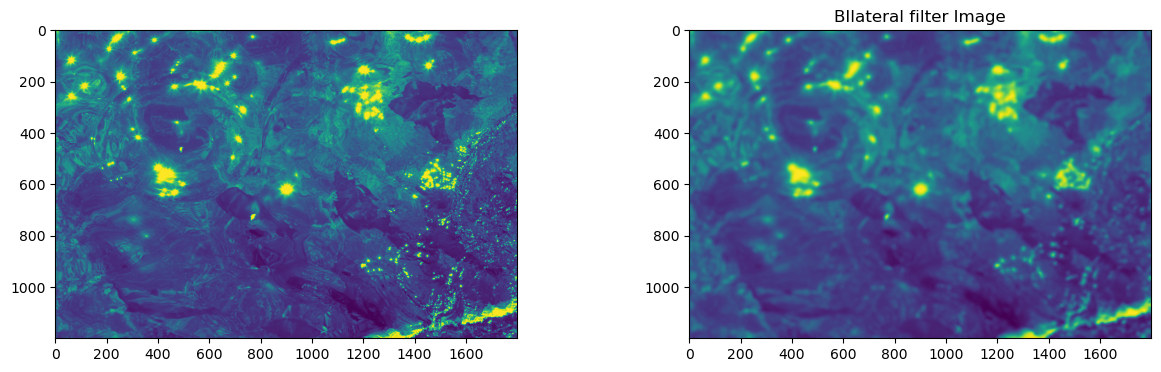

In [6]:
#应用双边滤波，在保留边缘的同时平滑图像
Bilateral_filter = cv2.bilateralFilter(img,20,200,300)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示双边滤波前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示双边滤波后的图像
axes[1].imshow(Bilateral_filter)
plt.title('BIlateral filter Image')
#保存双边滤波后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_4.jpg',Bilateral_filter)

True

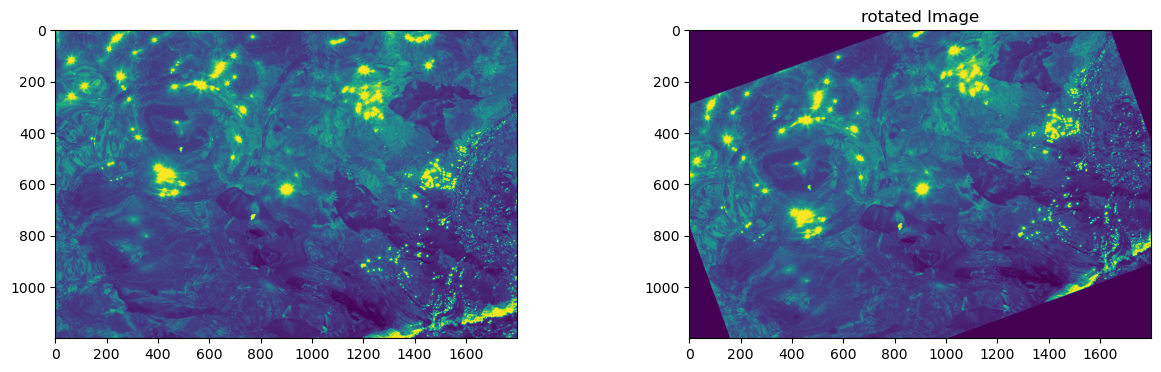

In [7]:
#取返回的图像维度（高度，宽度及颜色通道数）的前两个：高度h和宽度w
(h, w) = img.shape[:2]
#设定旋转角度为45度（逆时针）
angle = 20
#设定缩放比例（这里默认是原始大小不变）
scale = 1.0
#计算图像的中心点（这里用的整除，保证结果是整数）
center = (w // 2, h // 2)
#生成旋转矩阵
M = cv2.getRotationMatrix2D(center, angle, scale)
#对图像进行仿射变换
rotated_img = cv2.warpAffine(img, M, (w, h))
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示旋转前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示旋转后的图像
axes[1].imshow(rotated_img)
plt.title('rotated Image')
#保存旋转后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_5.jpg',rotated_img)

True

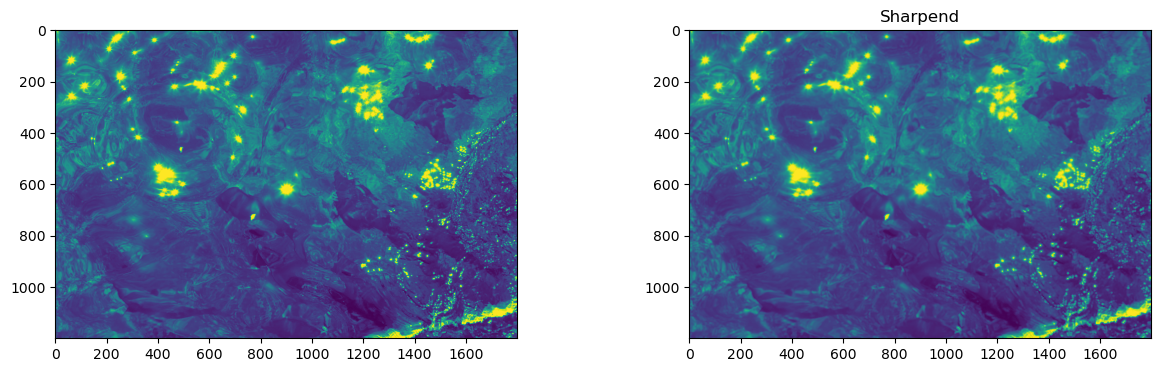

In [8]:
#计算图像的拉普拉斯变化
laplacian = cv2.Laplacian(img, cv2.CV_64F)
#进行锐化处理
sharpened = np.uint8(np.clip(img + laplacian, 0, 255))
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示拉普拉斯锐化前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示拉普拉斯锐化后的图像
axes[1].imshow(sharpened)
plt.title('Sharpend')
#保存拉普拉斯锐化后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_6.jpg',sharpened)

True

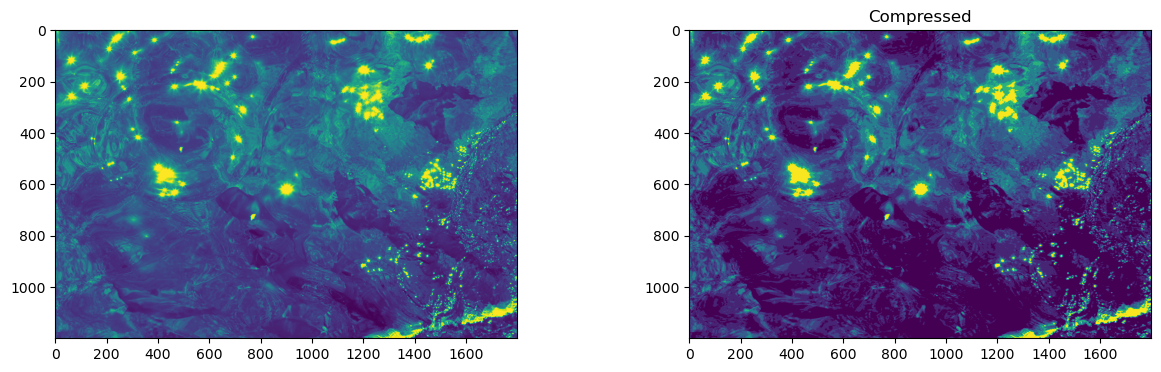

In [9]:
#将图像重新塑性成一个二维数组，每行表示一个像素的灰度（RGB）值
pixels = img.reshape((-1,3))
#将像素数据（一般是uint8类型）转换为浮点数类型，因为K-means聚类需要浮点数作为输入数据
pixels = np.float32(pixels)
#定义K-means聚类的终止条件，10为最大迭代次数，1.0是误差阈值（小于则算法中止）
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
#设置聚类的数量为8（将图像中的颜色分为8个不同的类别或簇）
K = 8
#对图像的像素数据进行聚类处理返回紧密度（每个点到中心的距离之和），每个像素点所属的簇标签，聚类中心的颜色值
ret, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#将聚类中心的数据类型转换回uint8，因为图像显示和保存的像素数据都需要是uint8类型（范围是0-255）
centers = np.uint8(centers)
#将聚类中心的颜色分配回每个像素
res = centers[labels.flatten()]
#将聚类压缩后的重塑为原始图像的形状，恢复图像的二维结构（行和列）
res2 = res.reshape((img.shape))
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示K-means聚类压缩前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示K-means聚类压缩后的图像
axes[1].imshow(res2)
plt.title('Compressed')
#保存K-means聚类压缩后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_7.jpg',res2)

True

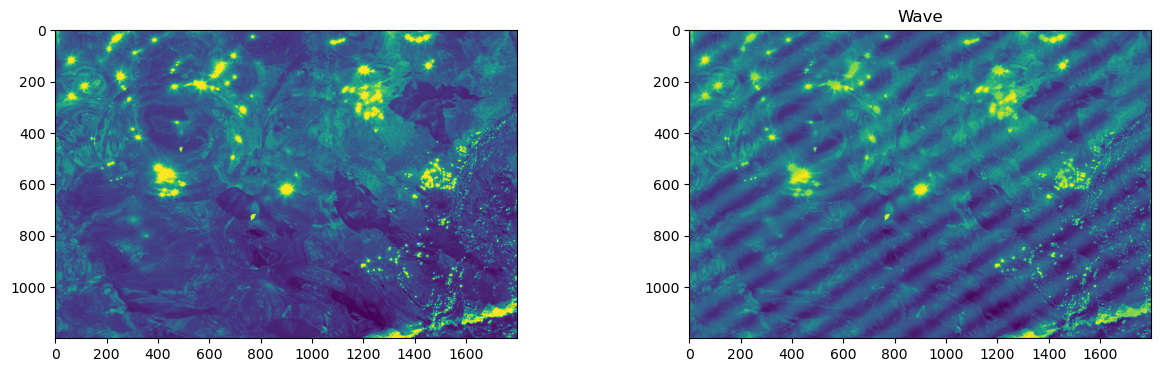

In [10]:
#取返回的图像维度（高度，宽度及颜色通道数）的前两个：高度h和宽度w
(h, w) = img.shape[:2]
#创建一个全为0的二维浮点数数组来存储要生成的波纹效果
wave = np.zeros((h, w), dtype=np.float32)
#生成一个从0到1的线性等间隔数值数组，用于表示图像水平方向的坐标点
x = np.linspace(0, 1, w)
#生成一个从0到1的线性等间隔数值数组，用于表示图像垂直方向的坐标点
y = np.linspace(0, 1, h)
#创建两个网格数组，构建一个完整的二维坐标系
X, Y = np.meshgrid(x, y)
#设置波纹的频率，控制波纹的密度程度
frequency = 10
#设置波纹的振幅，控制波纹的强度或高度
amplitude = 30
#计算波纹效果的值
wave = amplitude * np.sin((X + Y) * frequency * 2 * np.pi)
#将原始图像数据转换为浮点数类型（加法运算需要），并且将波纹效果加在图像上
img_waves = img.astype(np.float32) + wave
#使用函数对图像进行归一化，将像素值调整到0-255之间，因为uint8类型需要
img_waves = cv2.normalize(img_waves, None, 0, 255, cv2.NORM_MINMAX)
#将归一化后的数据类型转换回uint8，因为图像显示和保存的像素数据都需要是uint8类型（范围是0-255）
img_waves = img_waves.astype(np.uint8)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示添加波形变换前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示添加波形变换后的图像
axes[1].imshow(img_waves)
plt.title('Wave')
#保存添加波形变换后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_8.jpg',img_waves)

True

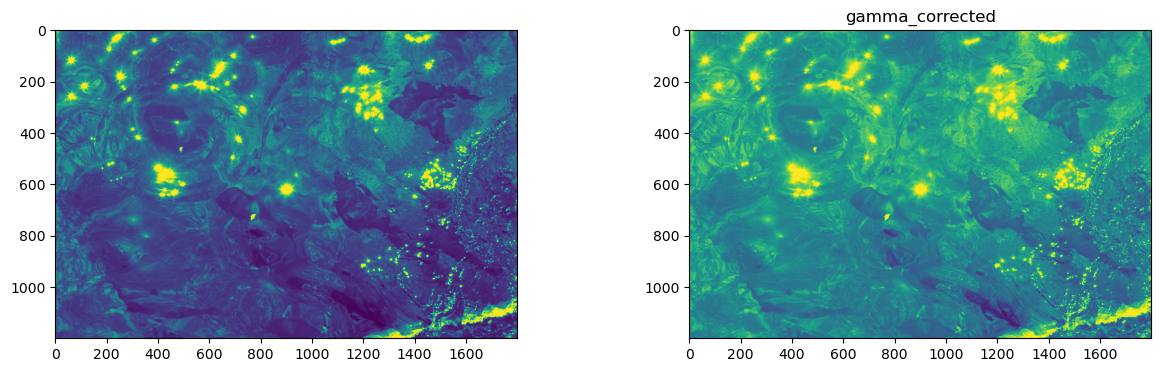

In [11]:
#定义伽马校正函数
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)
#应用伽马校正
gamma_corrected = adjust_gamma(img, gamma=2.0)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示伽马校正前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示伽马校正后的图像
axes[1].imshow(gamma_corrected)
plt.title('gamma_corrected')
#保存伽马校正后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_9.jpg',gamma_corrected)

True

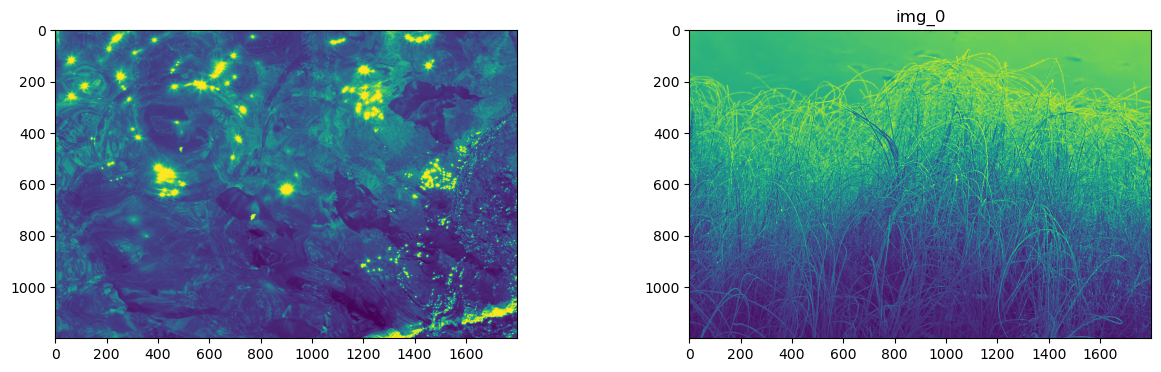

In [12]:
#以灰度模式读取完全不相关的一张风景图像
img_0 = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\img2.jpg', cv2.IMREAD_GRAYSCALE)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示不相关的风景图像
axes[1].imshow(img_0)
plt.title('img_0')
#保存不相关的风景图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_10.jpg',img_0)

True

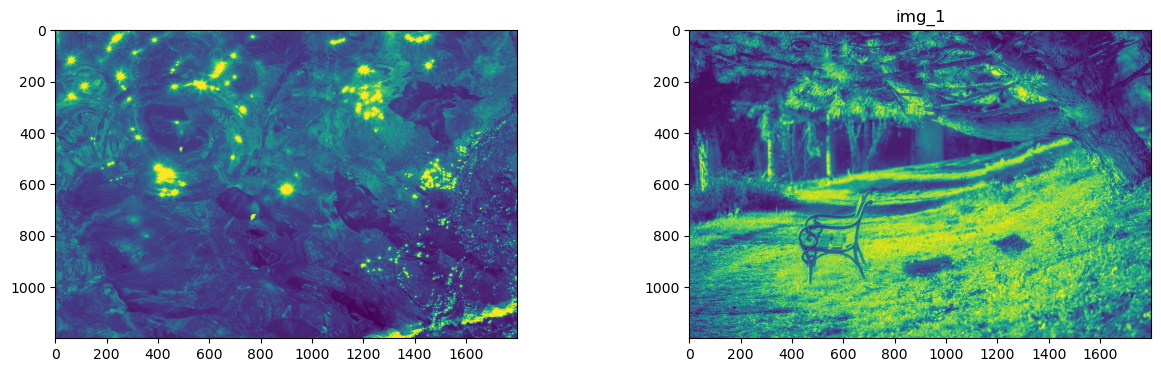

In [13]:
#以灰度模式读取完全不相关的一张风景图像
img_1 = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\img1.jpg', cv2.IMREAD_GRAYSCALE)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示不相关的风景图像
axes[1].imshow(img_1)
plt.title('img_1')
#保存不相关的风景图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_11.jpg',img_1)

True

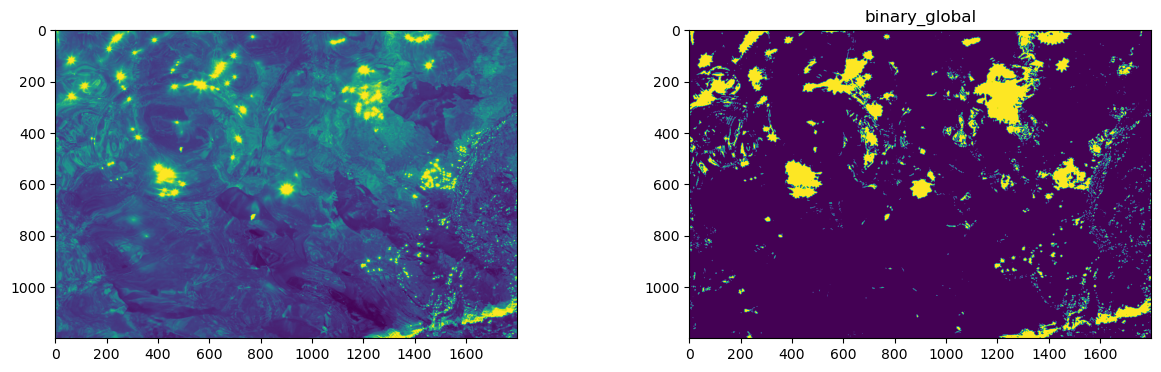

In [14]:
#创建全局自适应阈值
_, binary_global = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#创建一个1行2列的容器
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#显示伽马校正前的原始图像
axes[0].imshow(img)
plt.title('Original Image')
#显示伽马校正后的图像
axes[1].imshow(binary_global)
plt.title('binary_global')
#保存伽马校正后的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_12.jpg',binary_global)